Electric Vehicles Market Size Analysis using Python
1. Determines the potential sales volume in the given market
2. Determines the magnitude of the demand, assess market saturation levels and identify growth opportunities

VIN (1-10): Partial Vehicle Identification Number.
County: The county in which the vehicle is registered.
City: The city in which the vehicle is registered.
State: The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.
Postal Code: The postal code where the vehicle is registered.
Model Year: The year of the vehicle model.
Make: The manufacturer of the vehicle.
Model: The model of the vehicle.
Electric Vehicle Type: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
Clean Alternative Fuel Vehicle (CAFV) Eligibility: Eligibility status for clean alternative fuel vehicle programs.
Electric Range: The maximum range of the vehicle on a single charge (in miles).
Base MSRP: The Manufacturer’s Suggested Retail Price.
Legislative District: The legislative district where the vehicle is registered.
DOL Vehicle ID: Department of Licensing Vehicle Identification.
Vehicle Location: Geographic coordinates of the vehicle location.
Electric Utility: The electric utility service provider for the vehicle’s location.
2020 Census Tract: The census tract for the vehicle’s location.

In [1]:
import pandas as pd
ev_data = pd.read_csv(r'C:\Users\ADMIN\Untitled Folder\datasets\Electric_Vehicle_Population_Data.csv')
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [2]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [3]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [4]:
ev_data = ev_data.dropna()

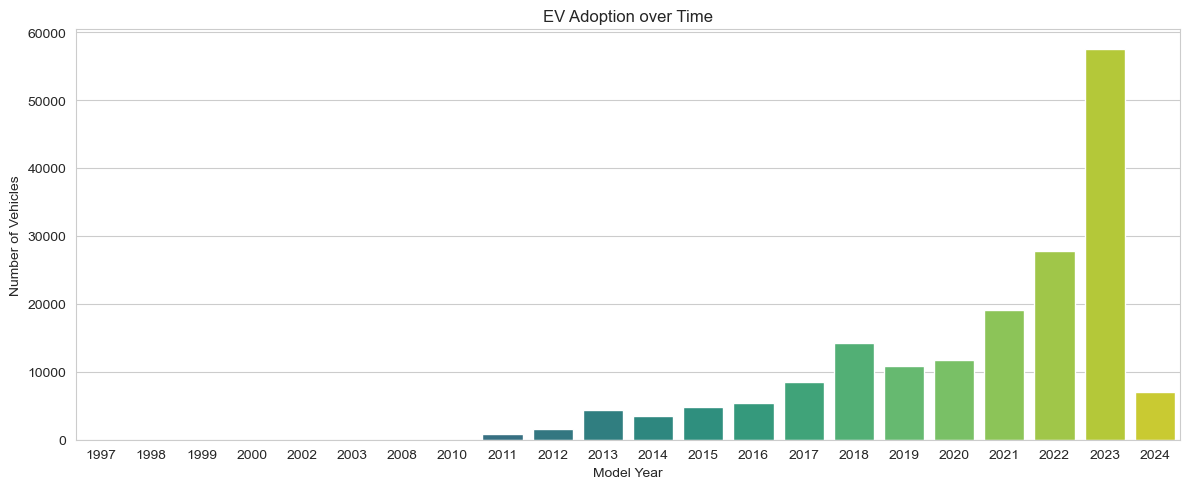

In [5]:
#visualizing the number of EVs registered by model year

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize = (12,5))
ev_adoption_by_year = ev_data["Model Year"].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette = 'viridis')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.title('EV Adoption over Time')
plt.tight_layout()
plt.show()

EV adoption has been increasing over time. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.

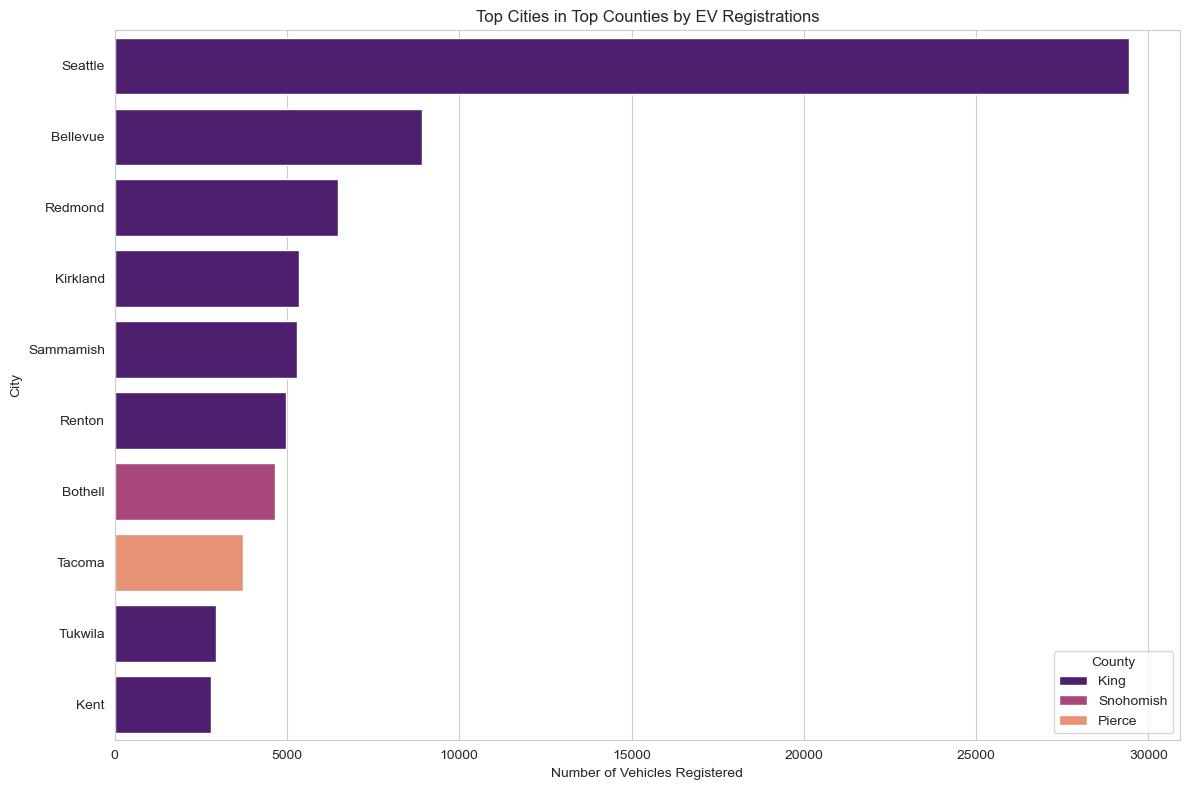

In [9]:
#selecting the top 3 counties based on EV registrations.
#Then analyzing the distribution of EVs within the cities of those counties.

ev_counties = ev_data["County"].value_counts()
ev_top_counties = ev_counties.head(3).index
ev_top_counties_data = ev_data[ev_data["County"].isin(ev_top_counties)]
ev_cities_in_top_counties_data = ev_top_counties_data.groupby(["County", "City"]).size().sort_values(ascending = False).reset_index(name = 'Number of Vehicles')
ev_top_cities = ev_cities_in_top_counties_data.head(10)
plt.figure(figsize = (12,8))
sns.barplot(x='Number of Vehicles', y = 'City', hue = 'County', data = ev_top_cities, palette = 'magma', dodge = False)
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

Seattle, which is in King County, has the highest number of EV registrations by a significant margin, far outpacing the other cities listed.
Bellevue and Redmond, also in King County, follow Seattle with the next highest registrations, though these are considerably less than Seattle’s.
Cities in Snohomish County, such as Kirkland and Sammamish, show moderate EV registrations.
Tacoma and Tukwila, representing Pierce County, have the fewest EV registrations among the cities listed, with Tacoma slightly ahead of Tukwila.
The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties.
Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.

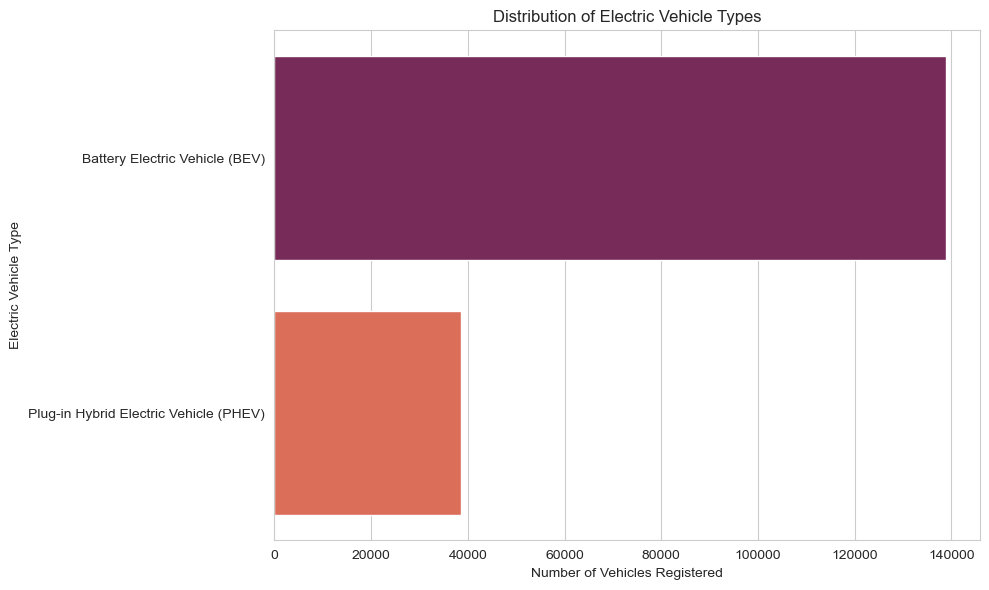

In [10]:
ev_type_data = ev_data['Electric Vehicle Type'].value_counts()
plt.figure(figsize = (10,6))
sns.barplot(x=ev_type_data.values, y=ev_type_data.index, palette = 'rocket')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.

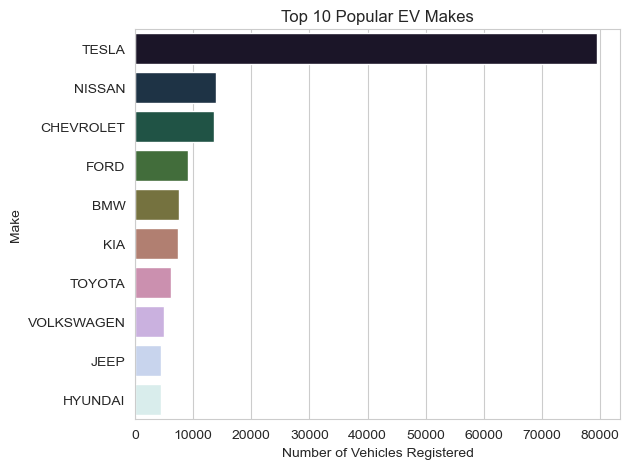

In [11]:
#popularity of electric vehicle manufacturers and models among the registered vehicles.

ev_data_make = ev_data['Make'].value_counts().head(10)
sns.barplot(x=ev_data_make.values, y=ev_data_make.index, palette = 'cubehelix')
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

Tesla is the most popular brand (leads by a substantial margin) followed by Nissan and Chevrolet.

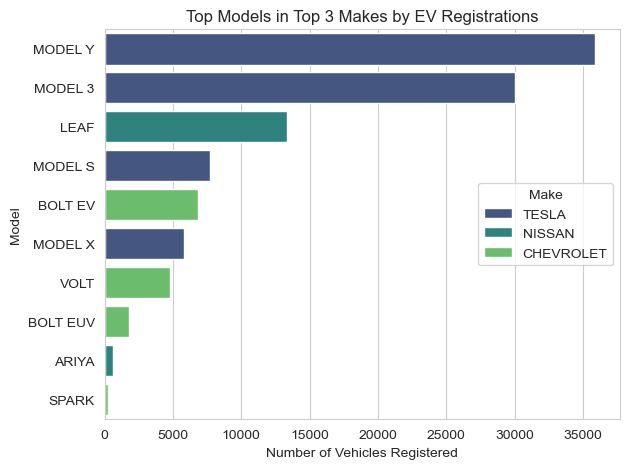

In [12]:
ev_data_make = ev_data['Make'].value_counts().head(3).index
ev_data_make_top = ev_data[ev_data['Make'].isin(ev_data_make)]
ev_data_make_values = ev_data_make_top.groupby(['Make', 'Model']).size().sort_values(ascending = False).reset_index(name = 'Number of Vehicles')
ev_data_top_models = ev_data_make_values.head(10)
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data = ev_data_top_models, palette = 'viridis', dodge = False)
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

Tesla’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
Nissan’s LEAF is the third most registered model and the most registered non-tesla vehicle.

The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years.

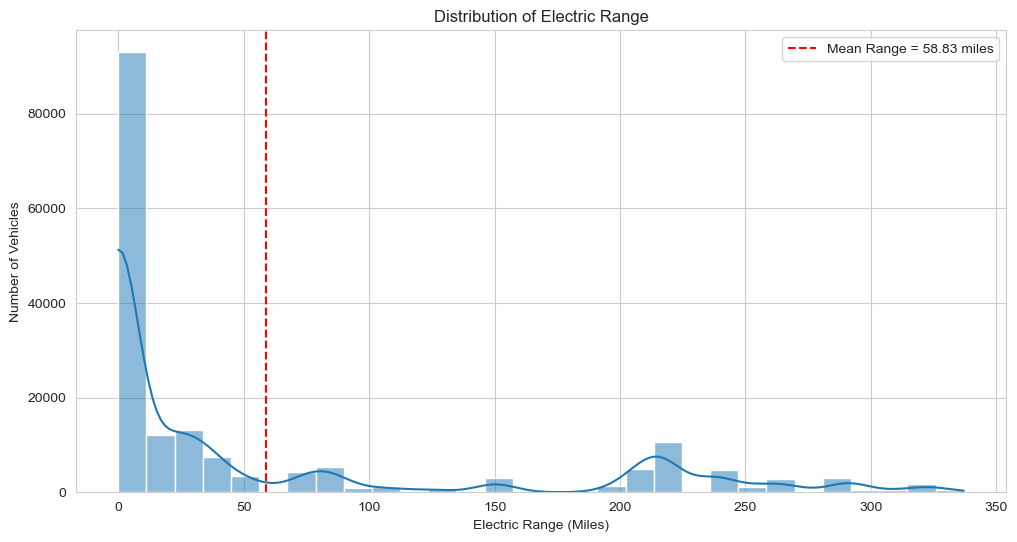

In [17]:
#analyzing distribution of electric range
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color = 'Red', linestyle = '--', label = f'Mean Range = {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

There is a high frequency of vehicles with a low electric range, with a significant peak occurring before 50 miles.
The distribution is right-skewed with a long tail extending towards higher ranges.
The mean electric range for the vehicles is at 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.
Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.
It suggests that while there are EVs available with high electric ranges, the average range is lower due to a substantial number of vehicles with shorter ranges.

The trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time. A positive trend in this analysis would indicate continuous improvements, offering consumers EVs with longer driving ranges and potentially addressing one of the major concerns regarding the EV market (range anxiety)

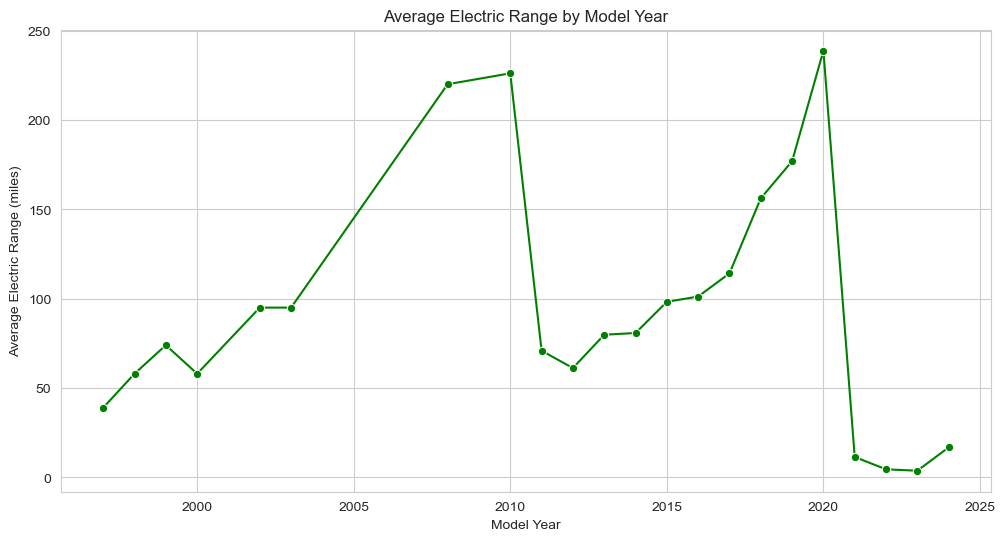

In [20]:
#calculating electric range by model year
ev_data_by_model_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=ev_data_by_model_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
There is a noticeable peak around the year 2020 when the average range reaches its highest point.
Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.

The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.

Next, let’s explore how electric ranges vary among the top manufacturers and models. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities

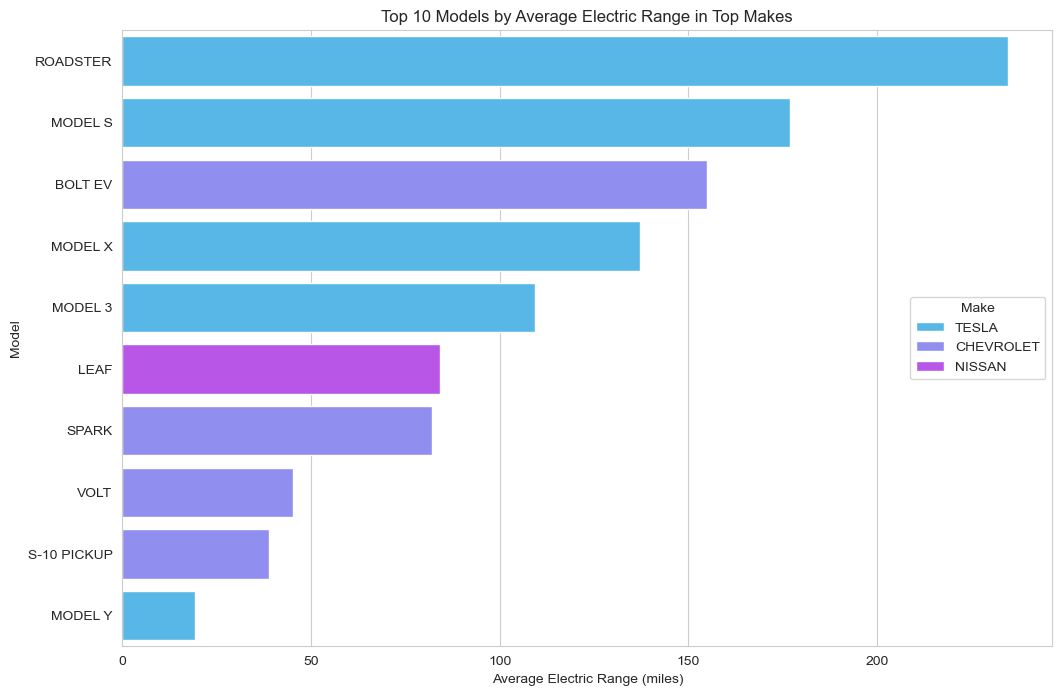

In [26]:
average_range_make_model = ev_data_make_top.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending = False).reset_index()
top_10 = average_range_make_model.head(10)
plt.figure(figsize = (12,8))
sns.barplot(x= 'Electric Range', y ='Model', hue = 'Make', data = top_10, palette = 'cool', dodge=False)
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

The Tesla ROADSTER has the highest average electric range among the models listed. Tesla’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, Tesla’s vehicles have higher electric ranges. The Chevrolet BOLT EV is an outlier among the Chevrolet models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. Nissan’s LEAF and Chevrolet’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

In [28]:
#calculating the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:-
In 2021, there were 19,063 EVs registered.
In 2022, the number increased to 27708 EVs.
In 2023, a significant jump to 57,519 EVs was observed.
For 2024, currently, 7,072 EVs are registered, which suggests partial data.

To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.

An exponential growth function is often used in data analysis and forecasting when the rate of growth of a quantity is proportional to its current value. 
Why Exponential Growth for EV Registrations??
As more consumers adopt EVs, the market grows not just from new buyers but also from repeat buyers and word-of-mouth effects, leading to faster growth.
Improvements in battery technology, reduction in costs, and increased availability of charging infrastructure can lead to rapid adoption rates.
Government policies, subsidies, and regulations aimed at reducing carbon emissions often promote the adoption of EVs, leading to accelerated growth.
Growing awareness of environmental issues and the benefits of EVs over traditional combustion engine vehicles can drive exponential growth in registrations.
Using an exponential growth function to model EV registrations is based on the understanding that the growth rate is not constant but increases over time due to various compounding factors. While this may not perfectly describe long-term trends (which could level off as the market saturates), it is a useful approximation for the current stage of EV market development.

In [29]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


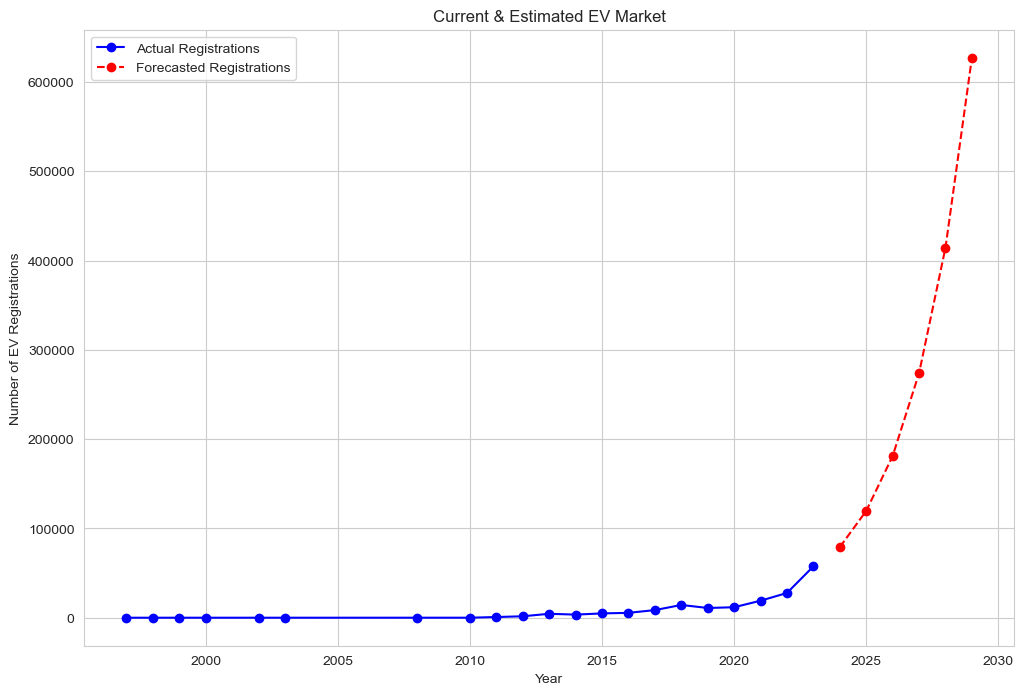

In [30]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()

The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.